In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
#Combine Data in one Dataset

CombineData = pd.merge(study_results, mouse_metadata, how = "outer" , on = "Mouse ID")

#Display the data table

CombineData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
#Checking # of Mice
Mice = CombineData["Mouse ID"].nunique()
Mice

249

In [6]:
#Geting Duplicate Mice ID and Timepoint

DuplicateId = CombineData.loc[CombineData.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
DuplicateId

array(['g989'], dtype=object)

In [7]:
#Extracting Data for all DuplicateId Mouse Id

Duplicte_df = CombineData.loc[CombineData['Mouse ID'] == "g989", :]
Duplicte_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
#Checking # of duplicate value using isin
Clean_df = CombineData[CombineData['Mouse ID'].isin(DuplicateId)==False]
Clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking number of Mice in Clean Dataframe

Clean_Mice = Clean_df["Mouse ID"].nunique()
Clean_Mice

248

In [10]:
#Using Groupby, Calculating Mean, Median, Variance, Std Deviation and SEM of tumor volume
Mean = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).mean()
Median = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).median()
Var = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).var()
Std = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).std()
Sem = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).sem()

Summary = pd.DataFrame({ "Mean Tumor Volume" : Mean,
                        "Median  Tumor Volume" : Median,
                        "Tumor Volume Variance" : Var,
                        "Tumor Volume Std. Dev" : Std,
                        "Tumor Volume Std. Err" : Sem })

Summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
#Generating Table of abopve output using aggregation method

Aggregation_Method = Clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Aggregation_Method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [12]:
#Generate plot Chart 
#Total number of Timepoint
Count = Clean_df["Drug Regimen"].value_counts()
Count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

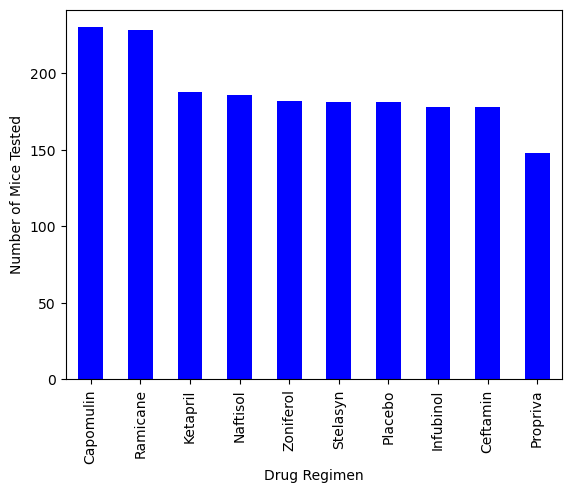

In [13]:
Plot = Count.plot.bar(color = 'blue')

#Adding x and y labels
plt.xlabel ("Drug Regimen")
plt.ylabel ("Number of Mice Tested")


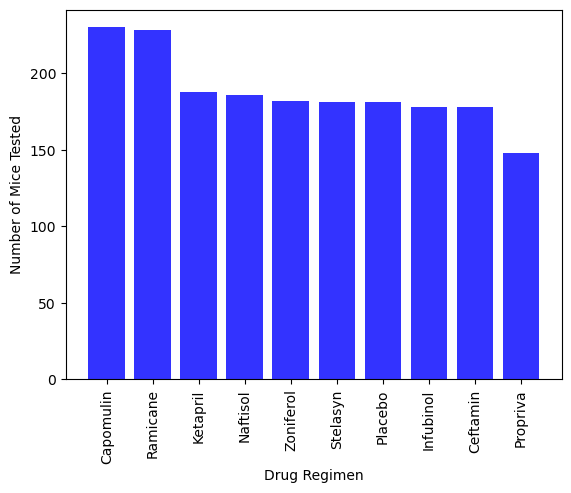

In [14]:
#bar plot showing mice tested for each drug regimen using pyplot
x_axis = Count.index.values
y_axis = Count.values

plt.bar(x_axis,y_axis, color = "blue" , alpha = 0.8 , align = "center")

#Adding x and y labels and Using xticks for vertical 
plt.xlabel ("Drug Regimen")
plt.ylabel ("Number of Mice Tested")
plt.xticks(rotation = "vertical")

plt.show()


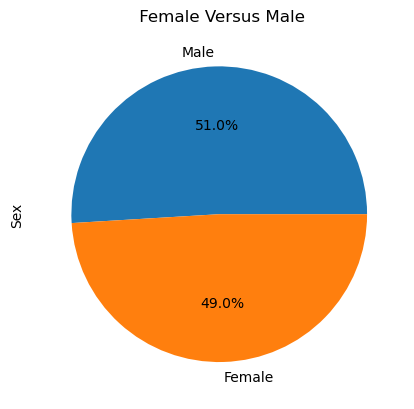

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Distribution = Clean_df["Sex"].value_counts()
explode = (0.1,0)
Distribution.plot.pie(autopct = "%1.1f%%")
plt.title(" Female Versus Male")
plt.show()

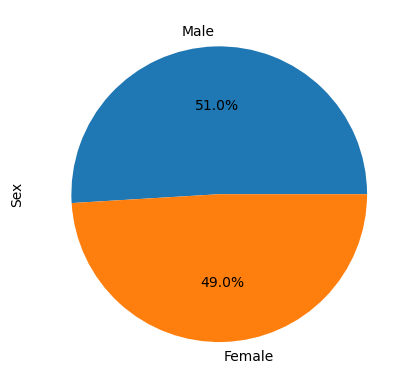

In [16]:
#female versus male mice

#Create labels and list the value of pie chart
labels = ["Female","Male"]
sizes = [49.799197,50.200803]


plot= Distribution.plot.pie(autopct = "%1.1f%%")

plt.show()

In [17]:
List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = CombineData[CombineData["Drug Regimen"].isin(List)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [18]:
Capomulin = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane = Clean_df.loc[Clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol = Clean_df.loc[Clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin = Clean_df.loc[Clean_df["Drug Regimen"] == "Ceftamin", :]

In [19]:
#Using For Loop 
#Creating empty list, calcultion of IQR to check for outliers

Mouse = CombineData.groupby(["Mouse ID"]).max()
MouseReset = Mouse.reset_index()

merged_data = MouseReset[['Mouse ID','Timepoint']].\
    merge(CombineData,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [20]:
#Using Stacking and unstacking for reshaping the dataframe
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in List:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


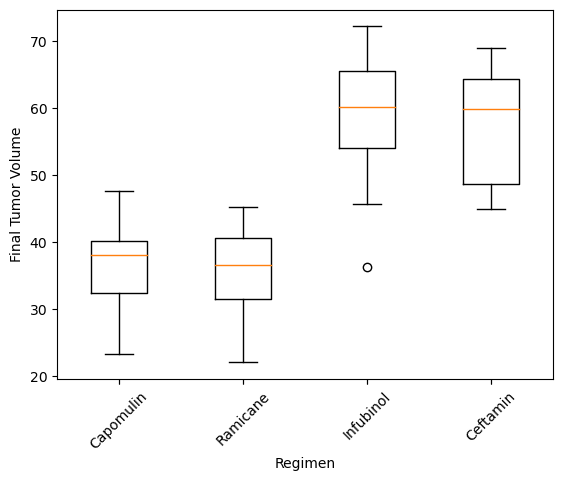

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
boxplot_list = []
for drug in List:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4],List, rotation=45)
plt.ylabel("Final Tumor Volume")
plt.boxplot(boxplot_list,labels = List)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

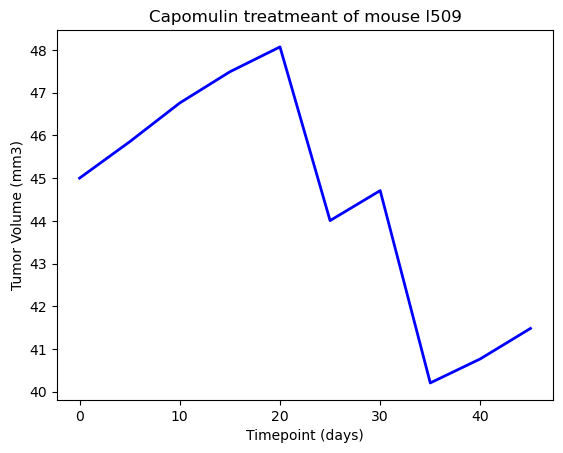

In [22]:
#Generate Line plot Capomulin


Capomulin = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin",:]

LineGraph = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
LineGraph.head()
x_axis = LineGraph["Timepoint"]
tumsiz = LineGraph["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

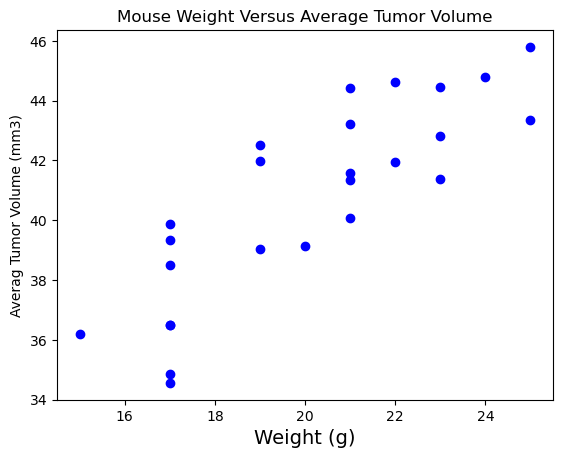

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig, axis = plt.subplots()
AvgTumor =Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(AvgTumor['Weight (g)'],AvgTumor['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

In [24]:
#Correlation and Regression
Correlation = st.pearsonr(AvgTumor['Weight (g)'],AvgTumor['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(Correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


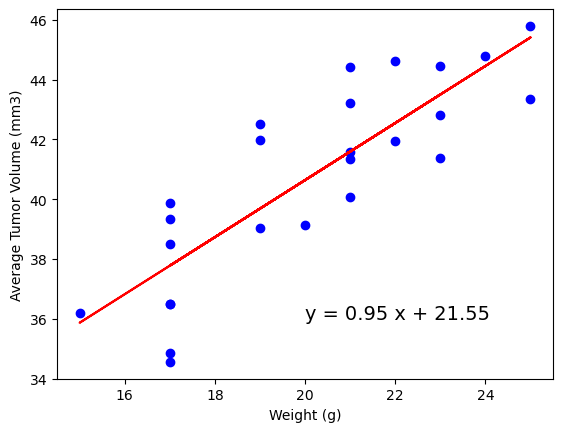

In [25]:
#Add Linear Regression equation and line plot

(slope, intercept,rvalue, pvalue, stderr)= linregress(AvgTumor["Weight (g)"],AvgTumor["Tumor Volume (mm3)"])
Regress=AvgTumor["Weight (g)"]* slope + intercept
lineEq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(AvgTumor["Weight (g)"],AvgTumor["Tumor Volume (mm3)"],color='b')
plt.plot(AvgTumor["Weight (g)"], Regress, color='red')
plt.annotate(lineEq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

In [ ]:
k